# Pereira et al (2020)<br />**Chimpanzee lip smacks**

- **Paper:** Pereira, A. S., Kavanagh, E., Hobaiter, C., Slocombe, K. E., & Lameira, A. R. (2020). Chimpanzee lip-smacks confirm primate continuity for speech-rhythm evolution. Biology Letters, 16(5), 20200232. https://doi.org/10.1098/rsbl.2020.0232
- **Dataset**: https://royalsocietypublishing.org/doi/suppl/10.1098/rsbl.2020.0232
- **Dataset licence:** unknown

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from src.intervals import save_intervals, load_intervals
from src.motifs import ngram_motifs, normalize, string_motifs 
from src.plotting import ternary_motif_plot

## Preprocessing

In [2]:
df = pd.read_csv('data/pereira2020/chimpanzee-lip-smack.csv', delimiter=";", decimal=",")

# Parse time series
fps = 25
df['ys'] = [np.array(eval(val)) for val in df['Standardized time series']]
df['N'] = [len(ys) for ys in df['ys']]
df['duration'] = df['N'] * 1/fps

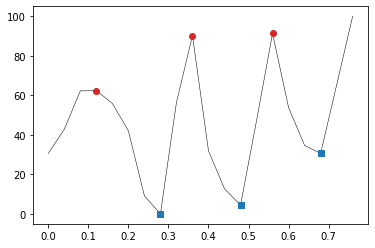

In [3]:
fps = 25
ys = df['ys'][0]
xs = np.arange(len(ys)) * 1/fps
peaks = find_peaks(ys)[0]
valleys = find_peaks(-ys)[0]
plt.plot(xs, ys, 'k-', lw=.5)
plt.plot(xs[peaks], ys[peaks], 'oC3')
plt.plot(xs[valleys], ys[valleys], 'sC0')

In [4]:
def get_iois(ys):
    peaks = find_peaks(ys)[0]
    xs = np.arange(len(ys)) * 1/fps
    onsets = xs[peaks]
    if len(peaks) > 2:
        intervals = onsets[1:] - onsets[:-1] 
        return intervals
    else:
        return []

# Add to dataframe
df['intervals'] = [get_iois(ys) for ys in df['ys']]

In [5]:
## Aggregate intervals
intervals = []
for ints in df['intervals']:
    intervals.extend(ints)
    intervals.append(np.nan)
intervals = np.array(intervals)

In [6]:
# Store
# save_intervals(intervals, 'pereira2020', 'chimpanzee-lip-smack')
# df.to_csv('intervals/pereira2020/chimpanzee-lip-smack-data.csv', index=False)

## Plot

(<Figure size 900x600 with 2 Axes>,
 TernaryAxesSubplot: 294437265,
 <matplotlib.colorbar.Colorbar at 0x118d67a90>)

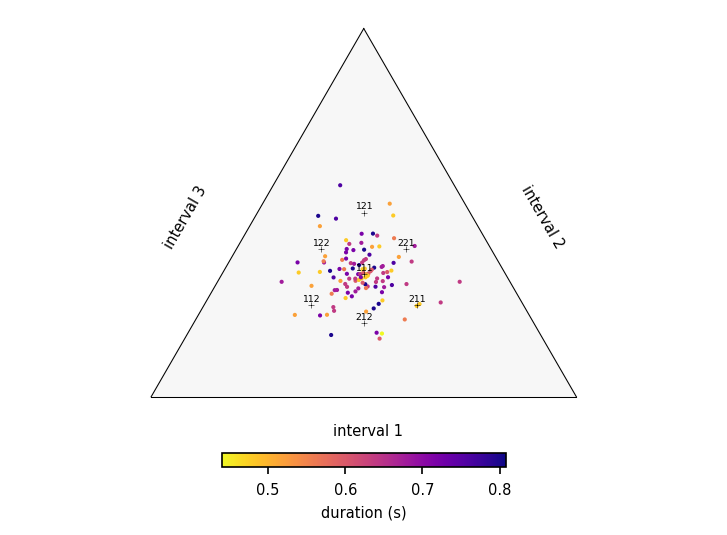

In [7]:
intervals = load_intervals('pereira2020', 'chimpanzee-lip-smack')
motifs, duration = normalize(ngram_motifs(intervals, length=3))
ternary_motif_plot(motifs, duration, ratio_kws=dict(factors=[1, 2]), scatter_kws=dict(s=4, alpha=1), jitter=0.01)